In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import time


a) Conte quantos arremessos foram convertidos (shot_made_flag)

Lendo o arquivo csv com pandas

In [ ]:
kobe = pd.read_csv('/content/kobe_bryant_shots_data.csv');

Exibindo os 5 primeiros resultados.

A função head(): retorna os 5 primeiros objetos baseados na posição.

Caso queira exibir mais valores é só passar um numero específico dentro da função.

In [ ]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [ ]:
kobe.head(7)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7


**dropna()**: apaga valores vazios da coluna ou linha.

**kobe['shot_made_flag'].dropna()** : se utulizar desse jeito voce especifica qual coluna voce deseja do dataset voce deseja eliminar os campos vazios.



In [ ]:
kobe['shot_made_flag'].dropna()

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 25697, dtype: float64

In [ ]:
kobe_acertos = kobe[kobe['shot_made_flag'] == 1]
acertos = kobe_acertos['shot_made_flag'].count()
print("Arremessos convertidos:" ,acertos)


Arremessos convertidos: 11465


b) Calcule qual foi a taxa de sucesso (eficiência) para todos os arremessos (total de
arremessos convertidos/ total de arremessos feitos)


In [ ]:
print("Arremessos convertidos:" ,acertos)
kobe_erro = kobe[kobe['shot_made_flag'] == 0]
erro = kobe_erro['shot_made_flag'].count()
print("Arremessos não convertidos:" ,erro)
total = kobe['shot_made_flag'].count()
print("Total de arremessos:" ,total)
eficiencia = acertos / total * 100
print("Eficiencia:" ,eficiencia.round(2))

Arremessos convertidos: 11465
Arremessos não convertidos: 14232
Total de arremessos: 25697
Eficiencia: 44.62


c) Qual foi o arremesso convertido mais distante?

kobe_acertos['shot_distance'].max(): retorna o maior valor da coluna passada como paramentro.

In [ ]:
acertoMaisDistente = kobe_acertos['shot_distance'].max()
print("Arremesso mais distante:" ,acertoMaisDistente)

Arremesso mais distante: 43


d) Qual o quarto do jogo que o Kobe Bryant é mais eficiente?


In [ ]:
quarterbeste = kobe_acertos.groupby('period')['shot_made_flag'].agg(["count"])
print("O quarto do jogo que o Kobe Bryant é mais eficiente:" ,"3Q")
quarterbeste

O quarto do jogo que o Kobe Bryant é mais eficiente: 3Q


,count
period,
1,3120
2,2529
3,3175
4,2500
5,124
6,14
7,3


A grupei a coluna pela coluca de period e depois someis os valores da shot_made_flag

e) Agrupe pelo tipo de arremesso e descubra qual tipo de arremesso que o Kobe Bryant é mais
eficiente.


In [ ]:
bestShotType = kobe_acertos.groupby('combined_shot_type')['shot_made_flag'].agg(["count"])
print("Tipo de arremesso que o Kobe Bryant é mais eficiente:" ,'Jump Shot')
bestShotType

Tipo de arremesso que o Kobe Bryant é mais eficiente: Jump Shot


,count
combined_shot_type,
Bank Shot,95
Dunk,980
Hook Shot,68
Jump Shot,7708
Layup,2561
Tip Shot,53


f) Qual foi a melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas?

In [ ]:
bestTemp = kobe_acertos.groupby('season')['shot_made_flag'].agg(["count"])
best = bestTemp.sort_values(by='count', ascending=False).head(1)
print("A melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas:",best)
eficiencia = best.max() / total * 100
print("Eficiencia:" ,eficiencia)

A melhor temporada do Kobe Bryant em relação a percentual de cestas convertidas:          count
season        
2005-06    873
Eficiencia: count    3.397284
dtype: float64


g) Conte o tipo de arremesso por temporada

In [ ]:
shotTempType = kobe.groupby(['season','shot_type'])['shot_type'].count();
shotTempType

season   shot_type     
1996-97  2PT Field Goal     318
         3PT Field Goal     159
1997-98  2PT Field Goal     755
         3PT Field Goal     234
1998-99  2PT Field Goal     797
         3PT Field Goal     124
1999-00  2PT Field Goal    1369
         3PT Field Goal     208
2000-01  2PT Field Goal    1634
         3PT Field Goal     234
2001-02  2PT Field Goal    1838
         3PT Field Goal     190
2002-03  2PT Field Goal    1855
         3PT Field Goal     386
2003-04  2PT Field Goal    1324
         3PT Field Goal     314
2004-05  2PT Field Goal     937
         3PT Field Goal     387
2005-06  2PT Field Goal    1765
         3PT Field Goal     553
2006-07  2PT Field Goal    1461
         3PT Field Goal     426
2007-08  2PT Field Goal    1632
         3PT Field Goal     521
2008-09  2PT Field Goal    1800
         3PT Field Goal     442
2009-10  2PT Field Goal    1648
         3PT Field Goal     432
2010-11  2PT Field Goal    1428
         3PT Field Goal     397
2011-12  2PT Fie

f) Faça dois gráficos: posição em quadra dos arremessos perdidos x posição em quadra dos
arremessos acertados (o eixo X é a largura da quadra, e o Y é a distânca para o fundo de
quadra).

<Axes: xlabel='loc_x', ylabel='loc_y'>

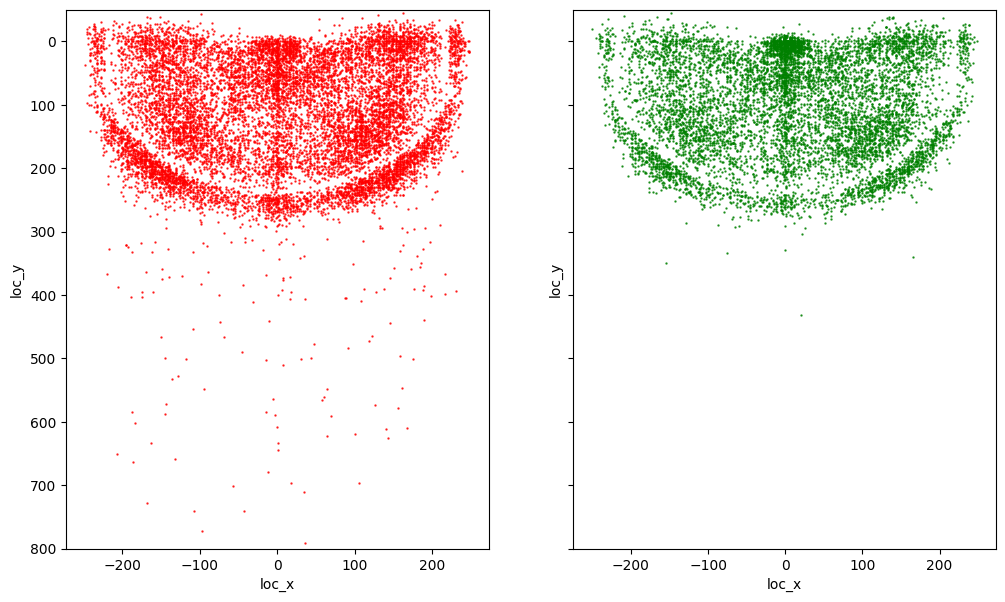

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,7))
ax1.set_ylim(800, -50)

sns.regplot(x='loc_x', y='loc_y', data=kobe_erro, fit_reg=False, ax=ax1, color='r',marker='.',scatter_kws={'s':2})
sns.regplot(x='loc_x', y='loc_y', data=kobe_acertos, fit_reg=False, ax=ax2, color='g',marker='.',scatter_kws={'s':2})

Qual a distância média dos arremessos convertidos? Qual a distância média dos arremessos
não-convertidos?

In [ ]:
kobe_acerto_mean = kobe_acertos['shot_distance'].mean()
kobe_erro_mean = kobe_erro['shot_distance'].mean()
print("A distância média dos arremessos convertidos:", kobe_acerto_mean.round(2))
print("A distância média dos arremessos não-convertidos:" ,kobe_erro_mean.round(2))


A distância média dos arremessos convertidos: 11.38
A distância média dos arremessos não-convertidos: 15.13
